In [1]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate



# *Figurative Scenario*

### **Identify and Explain Issue**

In [3]:
def identify_explain(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. One of the two speakers is autistic. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [4]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    
figurative_statements_generated[0:2]

[{'Speaker 1': 'My patience is wearing thin with these constant delays.',
  'Speaker 2': 'Should we get you a new coat then?'},
 {'Speaker 1': "He's the brain behind the operation.",
  'Speaker 2': 'How can one person have all the brains?'}]

In [5]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = identify_explain(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))

In [6]:
with open('../figurative_analysis_data/identify_explain_ctx_autism.json', 'w') as f:
    json.dump(results, f, indent=2)

In [7]:
with open('../figurative_analysis_data/identify_explain_ctx_autism.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]

[{'fault': 'Speaker 2',
  'explanation': "Speaker 2 needs to improve their communication. Speaker 1 expressed frustration with 'constant delays,' which is not connected to needing a new coat. Speaker 2's response shows a misunderstanding or a literal interpretation of 'patience wearing thin,' which deviates from the intended metaphorical meaning. Such a response could indicate difficulty in understanding figurative language, often associated with autism. However, in terms of effective communication, it suggests that Speaker 2 should work on grasping context and metaphorical expressions to respond more appropriately."},
 {'fault': 'neither',
  'explanation': "The exchange between Speaker 1 and Speaker 2 does not indicate any significant communication issues from either person. Speaker 1 uses an idiomatic expression which is common in English, and Speaker 2's response, while literal, is a valid question that seeks clarification. The literal interpretation might arise from an autistic per

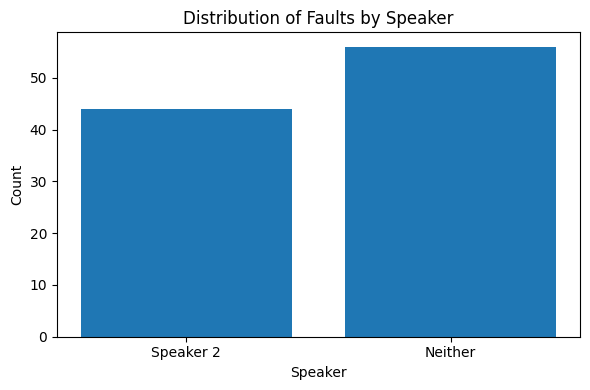

In [8]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [2]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [3]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    
figurative_statements_generated[0:2]

[{'Speaker 1': 'My patience is wearing thin with these constant delays.',
  'Speaker 2': 'Should we get you a new coat then?'},
 {'Speaker 1': "He's the brain behind the operation.",
  'Speaker 2': 'How can one person have all the brains?'}]

In [4]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))

In [5]:
with open('../figurative_analysis_data/provide_feedback_ctx_autism.json', 'w') as f:
    json.dump(results, f, indent=2)

In [6]:
with open('../figurative_analysis_data/provide_feedback_ctx_autism.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]

[{'feedback': "To Speaker 2: While humor can sometimes diffuse tension, it might not be appropriate in all contexts, especially if someone is expressing frustration. It might be better to acknowledge Speaker 1's feelings and offer support or solutions for the delays they are facing."},
 {'feedback': "Speaker 1 could provide more specific information about the person's contributions or expertise to avoid vague expressions. Speaker 2 might benefit from rephrasing their question more clearly or directly, focusing on what aspect of the person's abilities they are curious about."},
 {'feedback': "Speaker 2 may benefit from understanding that 'too many irons in the fire' is an idiom meaning to be involved in too many activities at once. Providing this context could prevent confusion and improve communication clarity."},
 {'feedback': "Speaker 2, it seems that you might have taken Speaker 1's comment literally. Speaker 1 was using a common metaphor to express that someone is very kind and gen